In [2]:
#Install Pulp package on your computer: run it only once
import sys 
!{sys.executable} -m pip install pulp 

## Example 

Minimize :  Z = 3x + 5y 
<br>
Subject to the constraints: 
<br>
$2x + 3y \geq 12$
<br>
$-x + y \leq 3 $
<br>
$ 4 \leq x \leq 10 $
<br>
$y \leq 3 $
<br>
$x, y \geq 0$

## Plot the feasible set

In [3]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt

C1 = lambda x : (12-2*x)/3
C2 = lambda x : 3 + x
C3 = lambda x : 4
C4 = lambda x : 3
C5 = lambda x : 10

x = np.arange(0., 15., 0.2)
y1 = np.array([C1(xi) for xi in x])
y2 = np.array([C2(xi) for xi in x])
y3 = np.array([C3(xi) for xi in x])
y4 = np.array([C4(xi) for xi in x])
y5 = np.array([C5(xi) for xi in x])


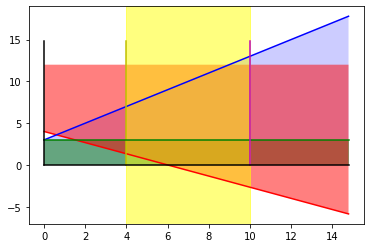

In [16]:
fig, ax = plt.subplots()
ax.plot(x, y1, 'r', x, y2, 'b', y3, x,'y', x, y4, 'g', y5, x,'m', x *0, x, 'k', x, x*0, 'k')
ax.fill_between(x, 0, y2, facecolor='blue', alpha=0.2)
ax.axvspan(4, 10, color='yellow', alpha=0.5)
ax.fill_between(x, 0, y4, facecolor='green', alpha=0.5)
ax.fill_between(x, y1, 12, facecolor='red', alpha=0.5)
plt.show()

In [17]:
# import the library pulp as p 
import pulp as p 
  
# Create a LP Minimization problem 
Lp_prob = p.LpProblem('Problem', p.LpMinimize)  
  
# Create problem Variables  
x = p.LpVariable("x", lowBound = 0)   # Create a variable x >= 0 
y = p.LpVariable("y", lowBound = 0)   # Create a variable y >= 0 

# Objective Function 
Lp_prob += 3 * x + 5 * y 
  
# Constraints: 
Lp_prob += 2 * x + 3 * y >= 12
Lp_prob += -x + y  <= 3
Lp_prob += x >= 4
Lp_prob += x <= 10
Lp_prob += y <= 3

# Display the problem 
print(Lp_prob) 
  
status = Lp_prob.solve()   # Solver 
print(p.LpStatus[status])   # The solution status 
  
# Printing the final solution 
print('x,y,minimum of the functional')
print(p.value(x), p.value(y), p.value(Lp_prob.objective))   

Problem:
MINIMIZE
3*x + 5*y + 0
SUBJECT TO
_C1: 2 x + 3 y >= 12

_C2: - x + y <= 3

_C3: x >= 4

_C4: x <= 10

_C5: y <= 3

VARIABLES
x Continuous
y Continuous

Optimal
x,y,minimum of the functional
6.0 0.0 18.0


## Linear Programming in Python using Pulp

In [18]:

# Create a LP Minimization problem 
Lp_prob = p.LpProblem('Problem', p.LpMinimize)  
  
# Create problem Variables  
x = p.LpVariable("x", lowBound = 0)   # Create a variable x >= 0 
y = p.LpVariable("y", lowBound = 0)   # Create a variable y >= 0 
z = p.LpVariable("z", lowBound = 0)   # Create a variable z >= 0  

# Objective Function 
Lp_prob += 3 * x + 5 * y + 2* z  
  
# Constraints: 
Lp_prob += 2 * x + 3 * y >= 8
Lp_prob += -x + y -z <= 3
Lp_prob += x >= 4
Lp_prob += x <= 10
Lp_prob += y <= 3
Lp_prob += z >= 5
  
# Display the problem 
print(Lp_prob) 
  
status = Lp_prob.solve()   # Solver 
print(p.LpStatus[status])   # The solution status 
  
# Printing the final solution 
print('x,y,minimum of the functional')
print(p.value(x), p.value(y), p.value(z), p.value(Lp_prob.objective))   

Problem:
MINIMIZE
3*x + 5*y + 2*z + 0
SUBJECT TO
_C1: 2 x + 3 y >= 8

_C2: - x + y - z <= 3

_C3: x >= 4

_C4: x <= 10

_C5: y <= 3

_C6: z >= 5

VARIABLES
x Continuous
y Continuous
z Continuous

Optimal
x,y,minimum of the functional
4.0 0.0 5.0 22.0
